In [1]:
# Importing necessary libraries
import json
import pandas as pd
import os 
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import numpy as np
import itertools
import pyvista as pv
from shapely.geometry import Polygon
from pyvista import examples



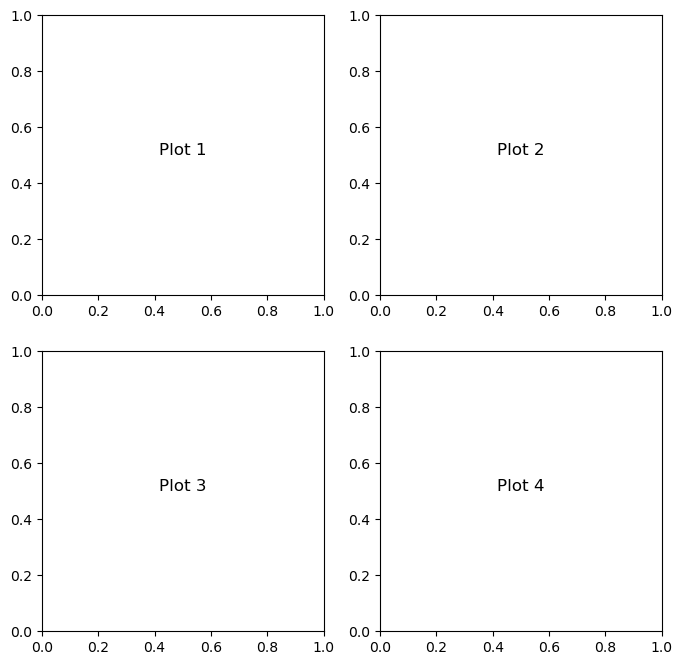

In [2]:
fig, m_axs = plt.subplots(2, 2, figsize=(8, 8))

# Flatten the axes to a 1D list
for i, ax in enumerate(m_axs.flatten()):
    ax.text(0.5, 0.5, f'Plot {i+1}', fontsize=12, ha='center')

plt.show()

In [3]:
data = {
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [25, 30, 35]
}
df = pd.DataFrame(data)
df

,name,age
0,Alice,25
1,Bob,30
2,Charlie,35


In [4]:
data = {
    'Store': ['A', 'B', 'A', 'B', 'A'],
    'Sales': [100, 150, 200, 300, 250],
    'Test': [1 , 2 ,3 ,4 ,5]
}

df = pd.DataFrame(data)

In [5]:
df

,Store,Sales,Test
0,A,100,1
1,B,150,2
2,A,200,3
3,B,300,4
4,A,250,5


In [6]:
grouped = df.groupby('Store')
grouped.groups

{'A': [0, 2, 4], 'B': [1, 3]}

In [8]:
total_sales = grouped['Sales'].sum()
total_sales

Store
A    550
B    450
Name: Sales, dtype: int64

In [9]:
for c_id, c_df in df.groupby('Store'):
    print(c_id)
    print(c_df)

A
  Store  Sales  Test
0     A    100     1
2     A    200     3
4     A    250     5
B
  Store  Sales  Test
1     B    150     2
3     B    300     4


In [1]:
import numpy as np

rng = np.random.default_rng()

# create dummy data
N = 10
angles = np.linspace(0, 2*np.pi, N, endpoint=False)
radii = rng.uniform(0.5, 1.5, N)
coords = np.array([np.cos(angles), np.sin(angles)]) * radii
points_2d = coords.T  # shape (N, 2)

# embed in 3d, create polygon
points_3d = np.pad(points_2d, [(0, 0), (0, 1)])  # shape (N, 3)
polygon = pv.lines_from_points(points_3d, close=True)

# extrude along z and plot
body = polygon.extrude((0, 0, 0.5))
body.plot(color='white', specular=1, screenshot='extruded.png')


NameError: name 'pv' is not defined

In [3]:
from pyvista import examples
mesh = examples.download_bunny()
mesh.plot(cpos='xy')

Widget(value='<iframe src="http://localhost:49286/index.html?ui=P_0x160c56f00_0&reconnect=auto" class="pyvista…

In [4]:
cyl = pv.Cylinder()
arrow = pv.Arrow()
sphere = pv.Sphere()
plane = pv.Plane()
line = pv.Line()
box = pv.Box()
cone = pv.Cone()
poly = pv.Polygon()
disc = pv.Disc()

In [5]:
p = pv.Plotter(shape=(3, 3))
# Top row
p.subplot(0, 0)
p.add_mesh(cyl, color="red", show_edges=True)
p.subplot(0, 1)
p.add_mesh(arrow, color="tan", show_edges=True)
p.subplot(0, 2)
p.add_mesh(sphere, color="tan", show_edges=True)
# Middle row
p.subplot(1, 0)
p.add_mesh(plane, color="tan", show_edges=True)
p.subplot(1, 1)
p.add_mesh(line, color="tan", line_width=3)
p.subplot(1, 2)
p.add_mesh(box, color="tan", show_edges=True)
# Bottom row
p.subplot(2, 0)
p.add_mesh(cone, color="tan", show_edges=True)
p.subplot(2, 1)
p.add_mesh(poly, color="tan", show_edges=True)
p.subplot(2, 2)
p.add_mesh(disc, color="tan", show_edges=True)
# Render all of them
p.show()

Widget(value='<iframe src="http://localhost:49286/index.html?ui=P_0x1639ba5a0_1&reconnect=auto" class="pyvista…

In [6]:
points = np.random.random((1000, 3))
pc = pv.PolyData(points)
pc.plot(scalars=points[:, 2], point_size=5.0, cmap='jet')

Widget(value='<iframe src="http://localhost:49286/index.html?ui=P_0x1638eb5c0_2&reconnect=auto" class="pyvista…

In [10]:
points = np.random.rand(100, 3) # 100 random points in 3D
points[0:5]  # output first 5 rows

array([[0.43809885, 0.71252889, 0.77105983],
       [0.1180161 , 0.91802436, 0.98098079],
       [0.49308629, 0.15538602, 0.56765291],
       [0.32385481, 0.04662001, 0.00701442],
       [0.73792507, 0.46327554, 0.34134166]])

In [11]:
mesh = pv.PolyData(points)
mesh

PolyData,Information
N Cells,100
N Points,100
N Strips,0
X Bounds,"1.008e-02, 9.950e-01"
Y Bounds,"1.659e-08, 9.591e-01"
Z Bounds,"1.454e-03, 9.973e-01"
N Arrays,0


In [16]:
pl = pv.Plotter()
pl.add_mesh(mesh, show_edges=True, color="white")
pl.add_points(mesh.points, color="red", point_size=10)
pl.show()

Widget(value='<iframe src="http://localhost:49286/index.html?ui=P_0x17424a420_7&reconnect=auto" class="pyvista…

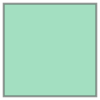

In [22]:
# Create a 2D polygon using Shapely
polygon_points = [(0, 0), (1, 0), (1, 1), (0, 1)]  # Define square polygon
polygon = Polygon(polygon_points)
polygon

In [23]:
# Get the x, y coordinates from the polygon
x, y = polygon.exterior.xy

x, y

(array('d', [0.0, 1.0, 1.0, 0.0, 0.0]), array('d', [0.0, 0.0, 1.0, 1.0, 0.0]))

In [28]:
# Convert the 2D polygon to a 3D mesh by extruding along the z-axis
z = np.zeros_like(x)  # Start at z=0 for the bottom face
top_z = np.ones_like(x) * 2  # Extrude to z=2 for the top face

z, top_z

(array([0., 0., 0., 0., 0.]), array([2., 2., 2., 2., 2.]))

In [33]:
# Create 3D points from the 2D polygon
points = np.vstack((x, y, z)).T

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [34]:
# Define the faces of the extrusion (bottom, top, and sides)
faces = np.array([4, 0, 1, 2, 3, 4, 4, 5, 6, 7])

In [37]:
# Create the mesh
mesh = pv.PolyData(points)

In [38]:
# Plot the extrusion
plotter = pv.Plotter()
plotter.add_mesh(mesh, color='blue')
plotter.show()

Widget(value='<iframe src="http://localhost:49286/index.html?ui=P_0x14810b500_9&reconnect=auto" class="pyvista…

In [21]:
# Define some helpers - ignore these and use your own data if you like!
def generate_points(subset=0.02):
    """A helper to make a 3D NumPy array of points (n_points by 3)."""
    dataset = examples.download_lidar()
    ids = np.random.randint(low=0, high=dataset.n_points - 1, size=int(dataset.n_points * subset))
    return dataset.points[ids]


points = generate_points()
# Output the first 5 rows to prove it's a numpy array (n_points by 3)
# Columns are (X, Y, Z)
points[0:5, :]

pyvista_ndarray([[4.80987475e+05, 4.40019330e+06, 1.76784998e+03],
                 [4.81066575e+05, 4.40010540e+06, 1.76107996e+03],
                 [4.80987875e+05, 4.40010130e+06, 1.76696997e+03],
                 [4.81123375e+05, 4.40013000e+06, 1.75914001e+03],
                 [4.81072975e+05, 4.40018810e+06, 1.75877002e+03]])

In [22]:
point_cloud = pv.PolyData(points)
point_cloud

PolyData,Information
N Cells,67841
N Points,67841
N Strips,0
X Bounds,"4.809e+05, 4.811e+05"
Y Bounds,"4.400e+06, 4.400e+06"
Z Bounds,"1.754e+03, 1.784e+03"
N Arrays,0


In [23]:
np.allclose(points, point_cloud.points)

True

In [24]:
point_cloud.plot(eye_dome_lighting=True)

Widget(value='<iframe src="http://localhost:49748/index.html?ui=P_0x17be7d340_5&reconnect=auto" class="pyvista…

In [25]:
# Make data array using z-component of points array
data = points[:, -1]
data[:5]

pyvista_ndarray([1767.84997559, 1761.07995605, 1766.9699707 ,
                 1759.14001465, 1758.77001953])

In [26]:
point_cloud.point_data['elevation'] = data

In [27]:
point_cloud.plot(render_points_as_spheres=True)

Widget(value='<iframe src="http://localhost:49748/index.html?ui=P_0x17bd6a4b0_6&reconnect=auto" class="pyvista…

In [28]:
# Create a random point cloud with Cartesian coordinates
points = np.random.rand(100, 3)
# Construct PolyData from those points
point_cloud = pv.PolyData(points)


def compute_vectors(mesh):
    """Create normalized vectors pointing outward from the center of the cloud."""
    origin = mesh.center
    vectors = mesh.points - origin
    return vectors / np.linalg.norm(vectors, axis=1)[:, None]


vectors = compute_vectors(point_cloud)
vectors[0:5, :]

pyvista_ndarray([[-0.31235286,  0.93986604, -0.13815762],
                 [-0.25430127, -0.69069169,  0.67696075],
                 [ 0.37048172,  0.32256374,  0.87103153],
                 [-0.71933975, -0.69424715,  0.02389999],
                 [ 0.32065548,  0.31922487,  0.89178223]])

In [29]:
point_cloud["vectors"] = vectors

In [30]:
arrows = point_cloud.glyph(
    orient="vectors",
    scale=False,
    factor=0.15,
)

# Display the arrows
plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color="maroon", point_size=10.0, render_points_as_spheres=True)
plotter.add_mesh(arrows, color="lightblue")
# plotter.add_point_labels([point_cloud.center,], ['Center',],
#                          point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()

Widget(value='<iframe src="http://localhost:49748/index.html?ui=P_0x17bd6a300_7&reconnect=auto" class="pyvista…